In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
##Data
K = 120
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 
       8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 
       8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 
       9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 
       3, 13, 1, 7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52, 55, 61, 31, 
       48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 
       43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 60, 46, 28, 
       33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 
       58, 62, 52, 41, 34, 52, 63, 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 
       45, 51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2, 7, 5, 8, 2, 
       3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 
       6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 
       3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 
       2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52, 55, 61, 31, 
       48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 
       43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 60, 46, 28, 
       33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 
       58, 62, 52, 41, 34, 52, 63, 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 
       45, 51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5, -5, -5, -5, 
         -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, 
         -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 
         4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

In [20]:
def logvraissemblance_r0(mu, r0, n0):
    r = 0
    for i in range(len(mu)):
        r += r0[i] * np.log(1/(1+np.exp(-mu[i]))) + (n0[i] - r0[i]) * np.log(1 - (1/(1+np.exp(-mu[i]))))
    return r

def logvraissemblance_r1(mu, alpha, beta1, beta2, b, year, r1, n1):
    r = 0
    for i in range(len(mu)):
        r += r1[i] * np.log(1/(1+np.exp(-(mu[i] + alpha + beta1*year[i] + beta2*(year[i]**2-22) + b[i])))) + (n1[i] - r1[i]) * np.log(1 - (1/(1+np.exp(-(mu[i] + alpha + beta1*year[i] + beta2*(year[i]**2-22) + b[i])))))
    return r

In [81]:
def gibbs(n_iterations, burnin, prop_sd,param_init,mu_init,bi_init, K,r1,r0,n1,n0,year):
    
    chain = np.zeros((n_iterations + 1, 4))
    chain[0, :] = param_init
    acc_rates = np.zeros(4)

    
    chain_mu = np.zeros((n_iterations + 1, K))
    chain_mu[0, :] = mu_init
    acc_rates_mu = np.zeros(K)

    
    chain_bi = np.zeros((n_iterations + 1, K))
    chain_bi[0, :] = mu_init
    acc_rates_bi = np.zeros(K)

    
    for i in range(1, n_iterations):
        
        alpha = chain[n_iterations,0]
        beta1 = chain[n_iterations,1]
        beta2 = chain[n_iterations,2]
        sigma = chain[n_iterations,3]

        mu = chain_mu[n_iterations, :]
        bi = chain_bi[n_iterations, :]
        
        # Mise à jour de alpha
        prop = np.random.normal(alpha, np.sqrt(prop_sd[0]))
        
        top = - prop**2 / (2 * 1E-6) + logvraissemblance_r1(mu, prop, beta1, beta2, bi,year, r1, n1)
        bottom = - alpha**2 / (2 * 1E-6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            alpha = prop
            acc_rates[0] += 1
        
        
        # Mise à jour de beta1
        prop = np.random.normal(beta1, np.sqrt(prop_sd[1]))
        
        top = - prop**2 / (2 * 1E-6) + logvraissemblance_r1(mu, alpha, prop, beta2, bi,year, r1, n1)
        bottom = - alpha**2 / (2 * 1E-6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            beta1 = prop
            acc_rates[1] += 1        
            
        # Mise à jour de beta1
        prop = np.random.normal(beta2, np.sqrt(prop_sd[2]))
        
        top = - prop**2 / (2 * 1E-6) + logvraissemblance_r1(mu, alpha, beta1, prop, bi,year, r1, n1)
        bottom = - alpha**2 / (2 * 1E-6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            beta2 = prop
            acc_rates[2] += 1
        
        ## Mise à jour de sigma
        a = prop_sd[3] + K/2
        b = (2 * prop_sd[4] + (np.sum(bi**2)/2))

        sigma = 1/np.sqrt(np.random.gamma(shape=a, scale=1/b))
        
        ## Mise à jour de mu
        for j in range(K):
            prop = np.random.normal(mu[j],prop_sd[5])
            
            top = - prop**2 / (2 * sigma**2) + r0[j] * np.log(1/(1+np.exp(-prop))) + (n0[j] - r0[j]) * np.log(1 - 1/(1+np.exp(-prop))) + r1[j] * np.log(1/(1+np.exp(-prop - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-prop - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            bottom = - mu[j]**2 / (2 * sigma**2) + r0[j] * np.log(1/(1+np.exp(-mu[j]))) + (n0[j] - r0[j]) * np.log(1 - 1/(1+np.exp(-mu[j]))) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            acc_prob=np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                acc_rates_mu[j] += 1
        
        ## Mise à jour de b
        for j in range(K):
            prop = np.random.normal(bi[j],prop_sd[6])
            
            top = - prop**2 / (2 * sigma**2) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - prop))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - prop)))
            
            bottom = - bi[j]**2 / (2 * sigma**2) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            acc_prob=np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                bi[j] = prop
                acc_rates_bi[j] += 1
        
        ##Mis a jour chaine
        chain[i+1,0] = alpha
        chain[i+1,1] = beta1
        chain[i+1,2] = beta2
        chain[i+1,3] = sigma
        chain_mu[i+1,:]=mu
        chain_bi[i+1,:]=bi
        
        
    ##Accetation rate
    acc_rates = acc_rates / n_iterations
    acc_rates_bi = acc_rates_bi / n_iterations
    acc_rates_mu = acc_rates_mu / n_iterations
        
    return chain,chain_bi,chain_mu,acc_rates,acc_rates_bi,acc_rates_mu

        
        
        

In [91]:
prop_sd_init=[0.01, 0.01, 0.01, 0.0001, 0.0001, 1, 1]
param_init=[0,0,0,1]
mu_init=np.zeros(120)
bi_init=np.zeros(120)
chain,chain_bi,chain_mu,acc_rates,acc_rates_bi,acc_rates_mu=gibbs(10000, 9000, prop_sd_init,param_init,mu_init,bi_init, K,r1,r0,n1,n0,year)

In [92]:
acc_rates

array([0.0127, 0.0112, 0.0147, 0.    ])

In [93]:
acc_rates_bi

array([0.2309, 0.2263, 0.2287, 0.2186, 0.2146, 0.2361, 0.2242, 0.235 ,
       0.2196, 0.1977, 0.2212, 0.2199, 0.1939, 0.2292, 0.2127, 0.2339,
       0.2238, 0.2118, 0.2169, 0.218 , 0.181 , 0.2294, 0.2073, 0.2154,
       0.2286, 0.1906, 0.2066, 0.205 , 0.2163, 0.2141, 0.2004, 0.2228,
       0.2166, 0.1765, 0.1926, 0.1924, 0.2234, 0.22  , 0.2047, 0.1938,
       0.221 , 0.1889, 0.1972, 0.1777, 0.2067, 0.2236, 0.2375, 0.2218,
       0.2129, 0.2233, 0.1917, 0.1878, 0.1796, 0.2011, 0.2088, 0.2276,
       0.2079, 0.2214, 0.2049, 0.2154, 0.1842, 0.1758, 0.2028, 0.204 ,
       0.2106, 0.2265, 0.2332, 0.2124, 0.1957, 0.1859, 0.1879, 0.1802,
       0.2016, 0.2095, 0.2104, 0.2288, 0.2064, 0.1973, 0.2149, 0.1816,
       0.1724, 0.1801, 0.2159, 0.1994, 0.2111, 0.2088, 0.2064, 0.2201,
       0.19  , 0.1953, 0.2053, 0.2046, 0.2177, 0.2215, 0.1943, 0.2025,
       0.1953, 0.1869, 0.218 , 0.2292, 0.226 , 0.2055, 0.1882, 0.2224,
       0.2203, 0.2287, 0.1921, 0.215 , 0.2036, 0.2193, 0.2187, 0.2239,
      

In [94]:
acc_rates_mu

array([0.214 , 0.2039, 0.2005, 0.1888, 0.1874, 0.1993, 0.1967, 0.1959,
       0.1776, 0.1654, 0.1779, 0.1845, 0.169 , 0.1858, 0.1723, 0.194 ,
       0.1849, 0.1671, 0.1757, 0.1724, 0.1524, 0.1923, 0.1675, 0.1734,
       0.1787, 0.1626, 0.1673, 0.1518, 0.1747, 0.1714, 0.1641, 0.1812,
       0.1855, 0.1474, 0.1527, 0.1487, 0.1787, 0.179 , 0.1706, 0.161 ,
       0.1779, 0.1579, 0.1664, 0.1374, 0.1651, 0.1837, 0.1924, 0.1929,
       0.162 , 0.1866, 0.1448, 0.1468, 0.1489, 0.1533, 0.177 , 0.1884,
       0.1725, 0.1882, 0.1622, 0.1776, 0.147 , 0.1442, 0.1591, 0.1684,
       0.1707, 0.1905, 0.1835, 0.1831, 0.1648, 0.1535, 0.1545, 0.1389,
       0.1619, 0.1602, 0.1749, 0.1948, 0.1749, 0.1655, 0.1643, 0.1471,
       0.1373, 0.1385, 0.1728, 0.1675, 0.186 , 0.1769, 0.1596, 0.181 ,
       0.1565, 0.1559, 0.1733, 0.1731, 0.1866, 0.178 , 0.1532, 0.1528,
       0.1481, 0.1502, 0.1754, 0.1866, 0.1763, 0.1662, 0.1501, 0.1809,
       0.1858, 0.1907, 0.1522, 0.1735, 0.1656, 0.1723, 0.182 , 0.1773,
      

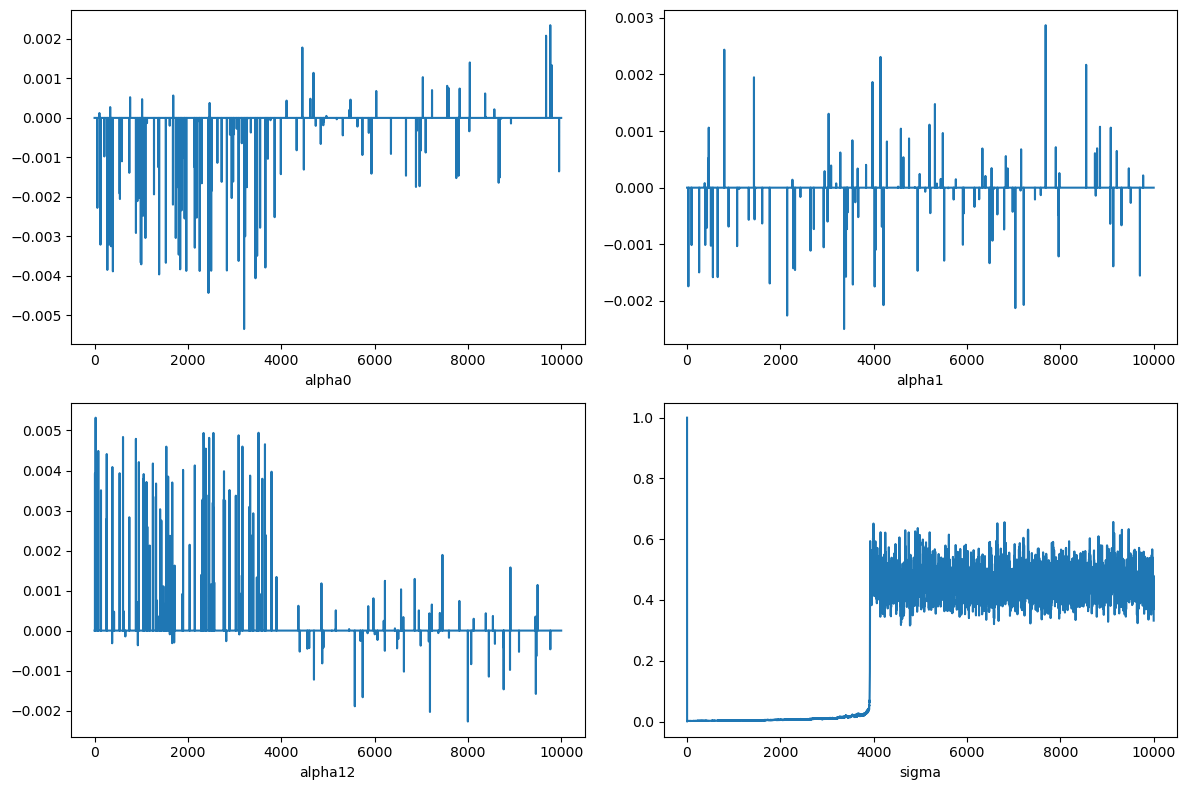

In [95]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].plot(chain[:, 0])
axs[0, 0].set_xlabel('alpha0')
axs[0, 1].plot(chain[:, 1])
axs[0, 1].set_xlabel('alpha1')
axs[1, 0].plot(chain[:, 2])
axs[1, 0].set_xlabel('alpha12')
axs[1, 1].plot(chain[:, 3])
axs[1, 1].set_xlabel('sigma')
plt.tight_layout()
plt.show()